# 중간고사

- 허용 : 온라인 검색, 프린트 자료 참고
- 금지 : 타인(외부인 포함)과 대화, 통신 
- 시험시간 : 18:30 ~ 20:00
- 제출방법 : "08-중간고사" 과제에 08-Midterm.ipynb 파일 제출


## 1. 데이터에 대한 분석 방법이 적절치 않은 것을 모두 고르시오 ( 0개  )   <- 괄호안에 쓸 것

#### ( 정답의 갯수는 0~5개 사이, 오답이 포함되면 감점, 예) 2개 썼는데 하나 맞고 하나 틀리면 0점 )

1. 성별에 따른 계절학기 수강 차이 분석 - 상관분석
2. 군 휴학 전 후의 평점 비교 - 평균비교
3. 강좌 별 수강신청 마감 소요 시간 분석 - 회귀분석 
4. 공부시간과 성적의 관계 - 상관분석
5. 연봉과 평점 관계 분석 - 평균비교

## 2. 이상치, 결측치, 오류값 등에 관한 설명 중 틀린 것을 모두 고르시오  ( 1, 3, 4, 5 ) <- 괄호안에 쓸 것

#### ( 정답의 갯수는 0~5개 사이, 오답이 포함되면 감점, 예) 2개 썼는데 하나 맞고 하나 틀리면 0점 )

1. 통계적 outlier 정의는 상하위 0.1%의 값을 말함
2. 연매출액이 800조원인 국내 기업 데이터는 오류값 임
3. 졸업 평점 4.5인 학생의 성적은 특이값임
4. nominal 데이터는 pd.Categorical() 을 통해 오류값을 제거할 수 있음
5. NA값이 있어도 단일 변수 통계는 산출 가능함


## 실습 문제

- 08.zip 안에 주어진 file을 이용하여 
- 특별한 지시가 없으면 답만 맞으면 됨 (warning은 괜찮음)
- 실행 결과를 포함하여 제출함
- 답안 작성에 문제 당 한 개 이상의 코드 블록을 써도 됨
- 3번부터 순서대로 실행시 개별 문제의 답이 실행 되어야 함 (필요한 라이브러리 등을 위쪽에서 import해야 함. 개별 문제 별로 중복 import할 필요 없음, 최종 제출 전 실행결과를 지우고 순서대로 실행해 볼 것)


In [87]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_partregress_grid

# 크롤링
import os
import sys
import datetime
import time
import json
import urllib.request

import re
from bs4 import BeautifulSoup 

import urllib3
import requests

# 데이터
import seaborn as sns

# 통계 분석
from scipy import stats
from scipy.stats import chisquare, levene, ttest_ind, ttest_rel
from statsmodels.formula.api import ols, glm
from statsmodels.stats.anova import anova_lm

# 머신 러닝
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

# 버전 오류 출력 X
import warnings
warnings.filterwarnings(action='ignore')

In [75]:
# 문제

import pandas as pd

dataset = pd.read_csv('bridges.data', names=['ID','River','Location_Idx', 'Built_Year', 'Purpose', 'Length',
                                             'Lanes', 'Clear_Ground', 'TorD', 'Material', 'Span', 'Rel_length', 'Type'])


## 3. Type이 'WOOD' 또는 'SUSPEN' 인 다리의 Purpose, Lane 컬럼을 출력하시오


In [76]:
print( dataset.loc[ dataset["Type"].isin(['WOOD', 'SUSPEN']), ["Purpose", "Lanes"] ] )

     Purpose Lanes
0    HIGHWAY     2
1    HIGHWAY     2
2   AQUEDUCT     1
3    HIGHWAY     2
4    HIGHWAY     2
5    HIGHWAY     2
6   AQUEDUCT     1
7    HIGHWAY     2
8   AQUEDUCT     1
9    HIGHWAY     2
10        RR     2
11   HIGHWAY     2
12   HIGHWAY     2
13        RR     2
14   HIGHWAY     2
17   HIGHWAY     2
18   HIGHWAY     2
20   HIGHWAY     ?
21   HIGHWAY     4
27   HIGHWAY     2
38  AQUEDUCT     1
42   HIGHWAY     2
69      WALK     ?
72   HIGHWAY     4
73   HIGHWAY     4
80   HIGHWAY     4
84   HIGHWAY     4


## 4. River의 분포를 파이 차트로 그리시오.

<Axes: ylabel='River'>

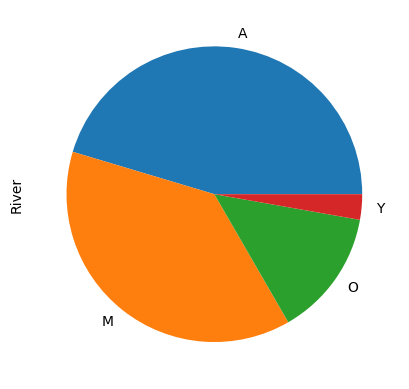

In [12]:
dataset.River.value_counts().plot(kind='pie')

## 5.  Lanes 의  평균 값을 구하시오
(Lanes 값이 유효한 모든 레코드에 대해서 구하시오)

In [57]:
dataset.Lanes[dataset['Lanes']=='?']
dataset.Lanes=dataset.Lanes.replace('?', np.NaN)
# dataset.shape  # (108, 13)

dataset=dataset.dropna()
# dataset.shape  # (92, 13) 으로 변경

print(dataset.Lanes.mean())

2.630434782608696


## 6. Type 별로  Length 가 다른지 분석하고, 분석 결과를 통계적으로  설명하시오. 
( Type과 Length가 모두 유효한 값을 갖는 81개의 레코드에 대해 분석해야 함)

            df        sum_sq       mean_sq         F    PR(>F)
Type       5.0  5.755743e+06  1.151149e+06  2.216945  0.061277
Residual  75.0  3.894374e+07  5.192499e+05       NaN       NaN


<Axes: xlabel='Type', ylabel='Length'>

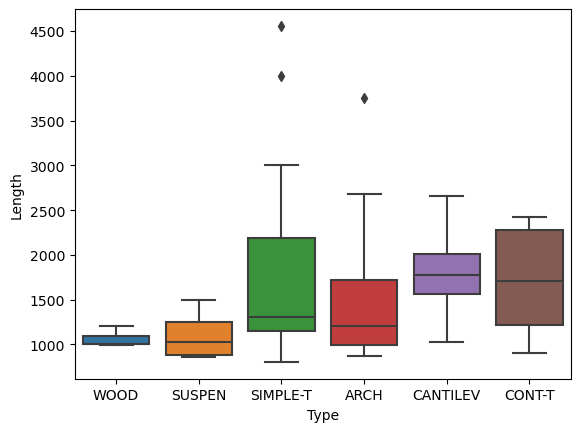

In [71]:
dataset = pd.read_csv('bridges.data', names=['ID','River','Location_Idx', 'Built_Year', 'Purpose', 'Length',
                                             'Lanes', 'Clear_Ground', 'TorD', 'Material', 'Span', 'Rel_length', 'Type'])
dataset.Type[dataset['Type']=='?']
dataset.Type=dataset.Type.replace('?', np.NaN)
dataset.Length[dataset['Length']=='?']
dataset.Length=dataset.Length.replace('?', np.NaN)

dataset=dataset.dropna()
dataset.Length= dataset.Length.astype('int')
# dataset.shape  # (81, 13)

model = ols('Length~Type', dataset).fit()
print( anova_lm(model) )

sns.boxplot(x='Type', y='Length', data=dataset)

#### 설명 : PR(>F)의 값이 0.061277로 0.05보다 크다. 따라서 통계적으로 유의미한 차이가 없다.

## 7. Span과 Type을 각기 적절한 방법으로 encoding 하시오. 전체 데이터를 바꾸지 않고 해당 컬럼에 대한 각각의 encoding결과만 출력되면 됨

In [147]:
dataset = pd.read_csv('bridges.data', names=['ID','River','Location_Idx', 'Built_Year', 'Purpose', 'Length',
                                             'Lanes', 'Clear_Ground', 'TorD', 'Material', 'Span', 'Rel_length', 'Type'])

# ? 값 제거
dataset.Span[dataset['Span']=='?']
dataset.Span=dataset.Span.replace('?', np.NaN)
dataset.Type[dataset['Type']=='?']
dataset.Type=dataset.Type.replace('?', np.NaN)

dataset= dataset.dropna()
dataset.shape  # (92, 13)

le = LabelEncoder()
dataset['Span'] = le.fit_transform(dataset['Span']);

le = LabelEncoder()
dataset['Type'] = le.fit_transform(dataset['Type']);

dataset

,ID,River,Location_Idx,Built_Year,Purpose,Length,Lanes,Clear_Ground,TorD,Material,Span,Rel_length,Type
0,E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,2,S,5
1,E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,2,S,5
3,E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,2,S,5
5,E7,A,27,1840,HIGHWAY,990,2,N,THROUGH,WOOD,1,S,5
6,E8,A,28,1844,AQUEDUCT,1000,1,N,THROUGH,IRON,2,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,E86,A,33,1961,HIGHWAY,980,4,G,DECK,STEEL,1,S-F,2
102,E85,M,9,1962,HIGHWAY,2213,4,G,DECK,STEEL,0,F,2
103,E84,A,24,1969,HIGHWAY,870,6,G,THROUGH,STEEL,1,F,0
104,E91,O,44,1975,HIGHWAY,3756,6,G,THROUGH,STEEL,0,F,0


## 8. Built_Year로 Length를 예측하는 linear regression model을 만드시오. 50% 의 데이터로 학습한 다음, 50%의 데이터로 테스트 ( 데이터 분할시 random seed로 1을 사용)  후 mse를 구하시오 

In [143]:

dataset = pd.read_csv('bridges.data', names=['ID','River','Location_Idx', 'Built_Year', 'Purpose', 'Length',
                                             'Lanes', 'Clear_Ground', 'TorD', 'Material', 'Span', 'Rel_length', 'Type'])

# ? 값 제거
dataset.Built_Year[dataset['Built_Year']=='?']
dataset.Built_Year=dataset.Built_Year.replace('?', np.NaN)
dataset.Length[dataset['Length']=='?']
dataset.Length=dataset.Length.replace('?', np.NaN)

dataset= dataset.dropna()

X = dataset.Built_Year.values.reshape(-1, 1)
Y = dataset.Length.values.reshape(-1, 1)

# 학습 데이터와 테스트 데이터로 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

## 모델 생성
lr = LinearRegression()

## 모델 훈련
lr.fit(X_train, Y_train)


Y_predict = lr.predict(X_test)
Y_predict

mse = mean_squared_error(Y_test, Y_predict)
print("mse :", mse)

mse : 413261.73326999566


## 9. auto-mpg.csv 파일 레코드 중 70%를 이용해서 실린더 수를 "분류"하는 svm 모델을 만들고 ( car_name, origin 필드는 사용하지 않음) 나머지 30%의 test data로 test하여 예측 성능 (accuracy)을 분석하시오 

In [97]:
# 읽어오기
data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

# 분석하지 않을 변수 제외하기
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)

# horsepower 이상치 제거 후 int 변환
data_df.horsepower = data_df.horsepower.replace('?', np.NaN)
data_df = data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')


Y = data_df['cylinders']
X = data_df.drop('cylinders', axis=1, inplace=False)

# 훈련용 데이터와 평가용 데이터 분할하기
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

# SVM : (1)모델 생성
model = svm.SVC()

# SVM : (2)모델 훈련
model.fit(X_train, Y_train)

# SVM : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = model.predict(X_test)

acccuracy = accuracy_score(Y_test, Y_predict)
print('정확도 :', acccuracy)

정확도 : 0.8728813559322034


정확도는 0.8728813559322034이다.

## 10.  9번의 데이터를 2 차원으로 축소(PCA)하여 결과를 비교하시오

In [99]:
# 읽어오기
data_df = pd.read_csv('auto-mpg.csv', header=0, engine='python')

# 분석하지 않을 변수 제외하기
data_df = data_df.drop(['car_name', 'origin'], axis=1, inplace=False)

# horsepower 이상치 제거 후 int 변환
data_df.horsepower = data_df.horsepower.replace('?', np.NaN)
data_df = data_df.dropna()
data_df.horsepower= data_df.horsepower.astype('int')

# Y 선언
Y = data_df['cylinders']
data_df = data_df.drop('cylinders', axis=1, inplace=False)

# fit & transform
pca = decomposition.PCA(n_components=2)
pca.fit(data_df)
data_df_pca = pca.transform(data_df)

X = data_df_pca


# 훈련용 데이터와 평가용 데이터 분할하기
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

# SVM : (1)모델 생성
model = svm.SVC()

# SVM : (2)모델 훈련
model.fit(X_train, Y_train)

# SVM : (3)평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = model.predict(X_test)

acccuracy = accuracy_score(Y_test, Y_predict)
print('정확도 :', acccuracy)

정확도 : 0.8983050847457628


정확도가 0.8983050847457628로 높아졌다.